In [1]:
import json
import os
import random

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from src.algorithm import *
from src.benchmark import *
from src.temperature import *

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)

In [3]:
def run_demo(test_func, test_clip, test_radius, test_target, test_dim, tabu_len, sched_name, sched_params, max_iterations):
    seed_everything(42)

    log = []
    best_point = np.full(test_dim, test_clip)

    tsa = TabuSimulatedAnnealing(radius=test_radius, clip=test_clip)
    tsa.set_minimize()
    tsa.set_start(point=np.full(test_dim, test_clip), score_function=test_func, tabu_length=tabu_len)

    t = 0
    n_better = 0
    n_worse = 0

    if sched_name == "adaptive":
        temperature = sched_params[0]

    while t < max_iterations:
        if sched_name == "constant":
            temperature = constant(sched_params)
        elif sched_name == "logarithmic":
            temperature = logarithmic(t, sched_params)
        elif sched_name == "geometric":
            temperature = geometric(t, sched_params[0], sched_params[1])
        elif sched_name == "adaptive":
            temperature = adaptive(temperature, sched_params[1], sched_params[2], n_better, n_worse)

        point, score, diff = tsa.next(temperature)
        log.append(point)

        if np.linalg.norm(point - test_target) <= test_radius:
            return log, point

        if diff == "better":
            n_better += 1
            best_point = point
        elif diff == "worse":
            n_worse += 1

        t += 1

    return log, best_point

In [4]:
log, best_point = run_demo(test_func=ackley, test_clip=32.768, test_radius=1.0, test_target=0.0, test_dim=2, tabu_len=5, sched_name="constant", sched_params=1.0, max_iterations=1e5)

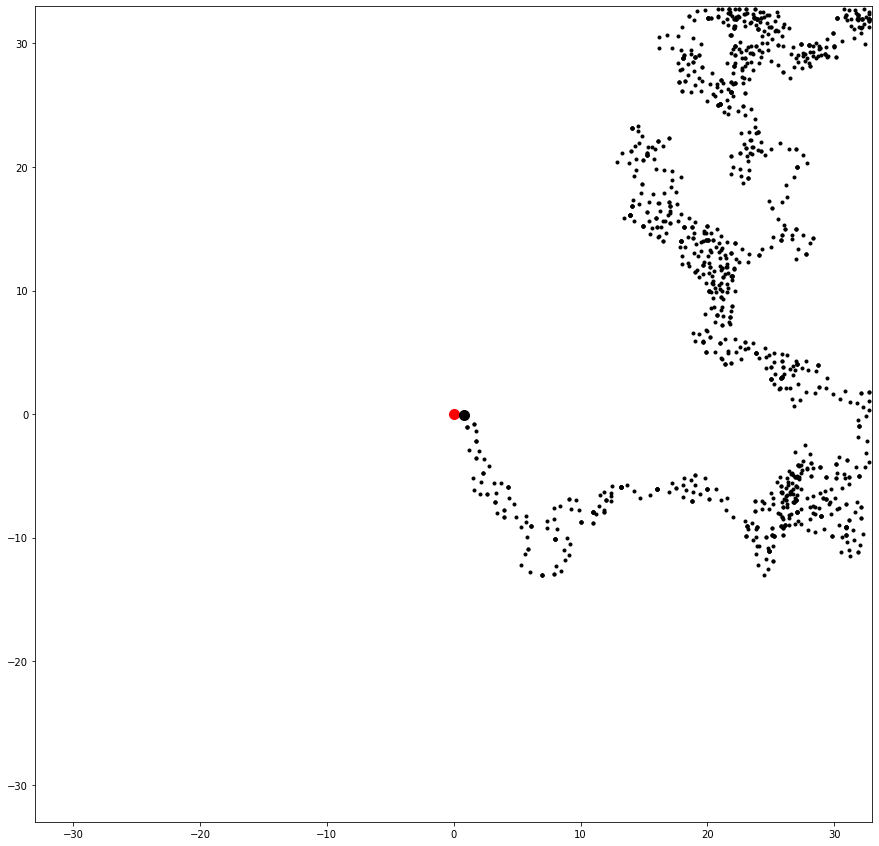

In [5]:
plt.figure(figsize=(15, 15))
plt.xlim(-33, 33)
plt.ylim(-33, 33)
for h in tqdm(log):
    plt.plot(h[0], h[1], color="black", marker="o", markersize=3)
plt.plot(0, 0, color="red", marker="o", markersize=10)
plt.plot(best_point[0], best_point[1], color="black", marker="o", markersize=10)
plt.show()